In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.table import Table
import numpy as np
import warnings
import scipy as scipy
from scipy import optimize
from scipy.optimize import differential_evolution
from tqdm import tqdm
from matplotlib.pyplot import cm
from collections import OrderedDict
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
def gaussian(x, mu, sig, A):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

In [3]:
errfunc1 = lambda p, x, y: (gaussian(x, *p) - y)**2

In [ ]:
hdulist = fits.open('../data/composite_Io_disk.fits')
evt_data = Table(hdulist[1].data)
image_data = hdulist[1].data
df = pd.read_csv('../data/io_on_disk.csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength = df['Wavelength']
df_species = df['Species']
wl = evt_data['WAVELENGTH'].data
flux = evt_data['FLUX'].data
wavelength_list = df_wavelength.values.tolist()
hdulist4 = fits.open('../data/composite_Io_jets.fits')
evt_data4 = Table(hdulist4[1].data)
image_data4 = hdulist4[1].data
df4 = pd.read_csv('../data/io_on_disk.csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength4 = df4['Wavelength']
df_species4 = df4['Species']
wl4 = evt_data4['WAVELENGTH'].data
flux4 = evt_data4['FLUX'].data

In [ ]:
i=4
line = wavelength_list[i]
left_bound = 0.9995*line
right_bound = 1.0005*line
sub_region = (evt_data['WAVELENGTH'] > left_bound) & (evt_data['WAVELENGTH'] < right_bound) #only take values within this area
wl = evt_data['WAVELENGTH'][sub_region]
flux = evt_data['FLUX'][sub_region]
wl4 = evt_data4['WAVELENGTH'][sub_region]
flux4 = evt_data4['FLUX'][sub_region]
unc = 0.1*flux #placeholder uncertainty
wl = wl.data
flux = flux.data
guess1 = [line, 1, 1200]
optim = optimize.least_squares(errfunc1, guess1, args=(wl, flux),
                               bounds=([guess1[0]-0.01, 0, 0],[guess1[0]+0.01, guess1[1]+0.1, guess1[2]+5]))

In [ ]:
optim['x'], guess1

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(wl, flux, 'g.', label='on disk')
plt.plot(wl4, flux4, 'r.', label='off disk')
plt.plot(wl, gaussian(wl, *optim['x']),
    lw=2, c='y', label='fit of 1 Gaussian')
plt.axvline(x=line, color = 'purple', linestyle = 'dotted')
plt.legend(loc='best')
plt.title('Line {}'.format(guess1[0]))

Let's calculate the brightness.

In [ ]:
args = optim['x']
sigma = args[1]
amp = args[2]
brightness = ((2*np.pi)**.5)*(amp*sigma)
brightness

In [4]:
hdulist = fits.open('../data/composite_Io_eclipsed (1).fits')
evt_data = Table(hdulist[1].data)
image_data = hdulist[1].data
df = pd.read_csv('../data/io_on_disk.csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength = df['Wavelength']
df_species = df['Species']
wl = evt_data['WAVELENGTH'].data
flux = evt_data['FLUX'].data
wavelength_list = df_wavelength.values.tolist()

In [272]:
x=58
i=x-2
line = wavelength_list[i]
left_bound = 0.9996*line
right_bound = 1.0004*line
sub_region = (evt_data['WAVELENGTH'] > left_bound) & (evt_data['WAVELENGTH'] < right_bound) #only take values within this area
wl = evt_data['WAVELENGTH'][sub_region]
flux = evt_data['FLUX'][sub_region]
unc = 0.1*flux #placeholder uncertainty
wl = wl.data
flux = flux.data
guess1 = [line, .25, 150]
optim = optimize.least_squares(errfunc1, guess1, args=(wl, flux),
                               bounds=([guess1[0]-0.05, 0, 0],[guess1[0]+0.05, guess1[1]+0.05, guess1[2]+1]))

Text(0.5, 1.0, 'Line 1306.029')

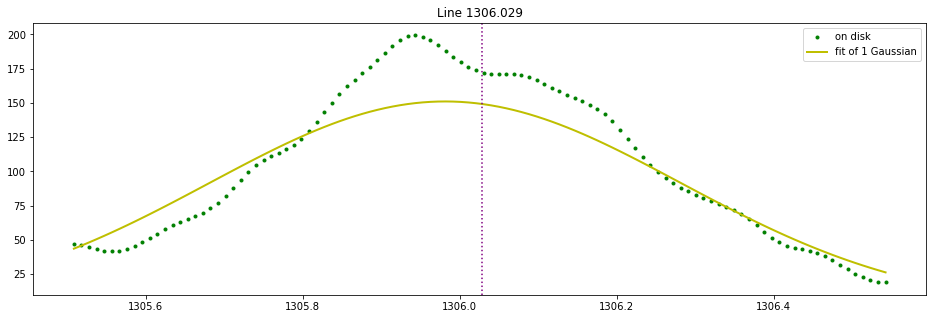

In [273]:
plt.figure(figsize=(16, 5))
plt.plot(wl, flux, 'g.', label='on disk')
plt.plot(wl, gaussian(wl, *optim['x']),
    lw=2, c='y', label='fit of 1 Gaussian')
plt.axvline(x=line, color = 'purple', linestyle = 'dotted')
plt.legend(loc='best')
plt.title('Line {}'.format(guess1[0]))

In [271]:
optim['x'], guess1

(array([1.30599325e+03, 2.46219397e-01, 1.87112979e+02]),
 [1306.029, 0.25, 200])

In [256]:
args = optim['x']
sigma = args[1]
amp = args[2]
brightness = ((2*np.pi)**.5)*(amp*sigma)
brightness

10.5278387534502